# Deep Learning - Part 1

#### Content

1. Tensors and how to work with Pytorch
2. Autograd in Pytorch
3. Solving a simple image classification using neural networks coded with Pytorch


#### Installing Pytorch

```pip install torch```

## 1. Tensors
Tensors are similar to NumPy’s ndarrays, with the addition being that Tensors can also be used on a GPU to accelerate computing.

### 1.1 Creating Tensors from data
Tensors can be created from Python lists with the `torch.Tensor()` function.

In [2]:
import torch
# Example with 1-D data
data = [1.0, 2.0, 3.0]
tensor = torch.Tensor(data)
print("Example with 1-D data")
print(tensor)

# Example with 2-D data
data = [[1., 2., 3.], [4., 5., 6]]
tensor = torch.Tensor(data)
print("\nExample with 2-D data")
print(tensor)

# Example with 3-D data
data = [[[1.,2.], [3.,4.]],
        [[5.,6.], [7.,8.]]]
tensor = torch.Tensor(data)
print("\nExample with 3-D data")
print(tensor)

Example with 1-D data
tensor([1., 2., 3.])

Example with 2-D data
tensor([[1., 2., 3.],
        [4., 5., 6.]])

Example with 3-D data
tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])


### 1.2 Initializing an empty Tensor
An uninitialized matrix is declared, but does not contain definite known values before it is used. When an uninitialized matrix is created, whatever values were in the allocated memory at the time will appear as the initial values.


In [2]:
# Construct a 2x3 matrix, uninitialized
x = torch.empty(2, 3)
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


### 1.3 Randomly initialized Tensor

1.3 Randomly initialized Tensor



In [3]:
x = torch.rand(2, 3)
print(x)

tensor([[0.4047, 0.8632, 0.5660],
        [0.1423, 0.1653, 0.8873]])


### 1.4 Tensor with zeros or ones

In [4]:
# Create a matrix of all zeros
x = torch.zeros(2, 3)
print("Matrix of zeros")
print(x)

# Create a matrix of all zeros and explicitly set data type to be long int
x = torch.zeros(2, 3, dtype=torch.long)
print("\nMatrix of zeros typecasted to long")
print(x)

x = torch.ones(2, 3, dtype=torch.long)
print("\nMatrix of ones typecasted to long")
print(x)


Matrix of zeros
tensor([[0., 0., 0.],
        [0., 0., 0.]])

Matrix of zeros typecasted to long
tensor([[0, 0, 0],
        [0, 0, 0]])

Matrix of ones typecasted to long
tensor([[1, 1, 1],
        [1, 1, 1]])


### 1.5 Create Tensor based on existing Tensor

In [14]:
x = x.new_ones(2, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)                                      # result has the same size

tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 0.7630,  0.5467, -0.5057],
        [-0.0787, -0.9274, -0.9443]])


### 1.6 Size of a Tensor
`torch.Size` is in fact a tuple, so it supports all tuple operations.

In [20]:
# Example with 1-D data
data = [1.0, 2.0, 3.0]
tensor = torch.Tensor(data)
print("Example with 1-D data")
print(tensor)
print(tensor.size())

# Example with 2-D data
data = [[1., 2., 3.], [4., 5., 6]]
tensor = torch.Tensor(data)
print("\nExample with 2-D data")
print(tensor)
print(tensor.size())

# Example with 3-D data
data = [[[1.,2.], [3.,4.]],
        [[5.,6.], [7.,8.]]]
tensor = torch.Tensor(data)
print("\nExample with 3-D data")
print(tensor)
print(tensor.size())

Example with 1-D data
tensor([1., 2., 3.])
torch.Size([3])

Example with 2-D data
tensor([[1., 2., 3.],
        [4., 5., 6.]])
torch.Size([2, 3])

Example with 3-D data
tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])
torch.Size([2, 2, 2])


### 1.7 Operations with Tensors
Most operations are very similar to NumPy.

In [21]:
# Addition
x = torch.Tensor([ 1., 2., 3. ])
y = torch.Tensor([ 4., 5., 6. ])

# using arithmetic operation
z = x + y
print(z)

# using method
print(torch.add(x, y))

# using method and providing an output tensor as argument
output = torch.empty(2, 3)
torch.add(x, y, out=output)
print(output)

tensor([5., 7., 9.])
tensor([5., 7., 9.])
tensor([5., 7., 9.])


/var/folders/l4/9h6cyd6s3yv14f4p2mpw0g0r0000gn/T/ipykernel_74991/1344850032.py:14: UserWarning: An output with one or more elements was resized since it had shape [2, 3], which does not match the required output shape [3]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/Resize.cpp:35.)
  torch.add(x, y, out=output)


In [10]:
# In-place addition

x = torch.Tensor([ 1., 2., 3. ])
y = torch.Tensor([ 4., 5., 6. ])

y.add_(x)
print(y)

tensor([5., 7., 9.])


Any operation that mutates a tensor in-place is post-fixed with an underscore `_`. For example: `x.copy_(y)`, `x.t_()`, will change `x`.

See [the PyTorch official documentation](http://pytorch.org/docs/torch.html) for a complete list of the massive number of operations available to you.  They expand beyond just mathematical operations.


In [5]:
# Indexing

x = torch.Tensor([[1., 2., 3.], [4., 5., 6]])
print(x[1, :]) # Gets column with index 1

tensor([4., 5., 6.])


### 1.8 Reshaping Tensors

In [33]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 2)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([8, 2])


In [34]:
x.reshape(-1,8)

tensor([[ 0.8429, -0.3375, -0.3172, -0.1402, -0.2490,  1.9698, -0.1648, -0.3851],
        [-1.2307,  2.7316,  1.0819, -1.0129,  0.0369,  0.2406, -0.2571, -1.5460]])

In [31]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([0.1663])
0.16633008420467377


### 1.9 Converting to and from NumPy
Converting a Torch Tensor to a NumPy array and vice versa is a breeze.

The Torch Tensor and NumPy array will **share their underlying memory locations** (if the Torch Tensor is on CPU), and **changing one will change the other**.




In [14]:
a = torch.ones(5)
print("Original a:", a)

b = a.numpy()
print("Original b:", b)

a.add_(1)
print("New a:", a)
print("New b:", b)

Original a: tensor([1., 1., 1., 1., 1.])
Original b: [1. 1. 1. 1. 1.]
New a: tensor([2., 2., 2., 2., 2.])
New b: [2. 2. 2. 2. 2.]


In [40]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a) # or b = torch.tensor(a) but you cannot dot this: """a.tensor()"""
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


#### Chaging the type of tensors

In [41]:
x = torch.tensor([1, 2, 3])         # default: int64
x = x.to(torch.float32)            # convert to float32

In [42]:
x = x.type(torch.FloatTensor)      # convert to float32

In [43]:
x = x.float()      # to float32  
x = x.double()     # to float64  
x = x.int()        # to int32  
x = x.long()       # to int64  
x = x.bool()       # to bool  

### 1.10 CUDA Tensors

Tensors can be moved onto any device using the `.to` method.


In [16]:
# Try to run this cell with both GPU support and without
print("CUDA available?", torch.cuda.is_available())

# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    x = torch.Tensor([1.0, 2.0, 3.0])
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

CUDA available? False


In [ ]:
# You cannot do the operaions on tensors on different devices
a = torch.tensor([1.0], device='cuda')
b = torch.tensor([2.0], device='cpu')

# Move b to CUDA
b = b.to('cuda')
c = a + b

## 2. Autograd: Automatic Differentiation

The autograd package provides automatic differentiation for all operations on Tensors. It is a define-by-run framework, which means that your backprop is defined by how your code is run, and that every single iteration can be different.

``torch.Tensor`` is the central class of the package. If you set its attribute
``.requires_grad`` as ``True``, it **starts to track all operations on it**. When
you finish your computation you can call ``.backward()`` and have **all the
gradients computed automatically**. The gradient for this tensor will be
accumulated into ``.grad`` attribute.

To **stop a tensor from tracking history**, you can call ``.detach()`` to detach
it from the computation history, and to prevent future computation from being
tracked.

To **prevent tracking history (and using memory)**, you can also wrap the code block
in ``with torch.no_grad():``. This can be particularly helpful when evaluating a
model because the model may have trainable parameters with `requires_grad=True`,
but for which we don't need the gradients.

In [17]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [18]:
y = x + 2
print(y)

# y was created as a result of an operation, so it has a grad_fn.

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [19]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


``.requires_grad_( ... )`` changes an existing Tensor's ``requires_grad``
flag in-place. The input flag defaults to ``False`` if not given.



In [20]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


#### Let us consider a complete example now.
We aim to calculate $\frac{\partial out}{\partial x_i} $

Let $out = \frac{1}{4}\sum_i z_i$,  
$z_i = 3(x_i+2)^2$  
and $z_i\bigr\rvert_{x_i=1} = 27$.  
Therefore,  
$\frac{\partial out}{\partial x_i} = \frac{1}{4}\frac{\partial z_i}{\partial x_i} = \frac{1}{4}.3.2(x_i+2) = \frac{3}{2}(x_i+2)$,  
 hence  
$\frac{\partial out}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{9}{2} = 4.5$.



In [21]:
x = torch.ones(2, 2, requires_grad=True)
y = x + 2
z = y * y * 3
out = z.mean()

grads = out.backward()
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


Mathematically, if you have a vector valued function $\vec{y}=f(\vec{x})$, then the gradient of $\vec{y}$ with respect to $\vec{x}$ is a Jacobian matrix:
\begin{split}J=\left(\begin{array}{ccc}
 \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}}\\
 \vdots & \ddots & \vdots\\
 \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
 \end{array}\right)\end{split}

Generally speaking, `torch.autograd` is an engine for computing vector-Jacobian product. That is, given any vector $v=\left(\begin{array}{cccc} v_{1} & v_{2} & \cdots & v_{m}\end{array}\right)^{T}$, compute the product $v^{T}\cdot J$. If $v$ happens to be the gradient of a scalar function $l=g\left(\vec{y}\right)$, that is, $v=\left(\begin{array}{ccc}\frac{\partial l}{\partial y_{1}} & \cdots & \frac{\partial l}{\partial y_{m}}\end{array}\right)^{T}$, then by the chain rule, the vector-Jacobian product would be the gradient of $l$ with respect to $\vec{x}$:
\begin{split}J^{T}\cdot v=\left(\begin{array}{ccc}
 \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{1}}\\
 \vdots & \ddots & \vdots\\
 \frac{\partial y_{1}}{\partial x_{n}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
 \end{array}\right)\left(\begin{array}{c}
 \frac{\partial l}{\partial y_{1}}\\
 \vdots\\
 \frac{\partial l}{\partial y_{m}}
 \end{array}\right)=\left(\begin{array}{c}
 \frac{\partial l}{\partial x_{1}}\\
 \vdots\\
 \frac{\partial l}{\partial x_{n}}
 \end{array}\right)\end{split}

(Note that $v^{T}\cdot J$ gives a row vector which can be treated as a column vector by taking $J^{T}\cdot v$.)

This characteristic of vector-Jacobian product makes it very convenient to feed external gradients into a model that has non-scalar output.

You can also stop autograd from tracking history on Tensors with `.requires_grad=True` either by wrapping the code block in with `torch.no_grad()`:

In [22]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


### 3. Problem to solve: Classify hand written digits using the MNIST dataset 

It’s a set of 60,000 training
images, plus 10,000 test images, assembled by the National Institute of Standards and
Technology (the NIST in MNIST) in the 1980s. You can think of “solving” MNIST as the
“Hello World” of deep learning—it’s what you do to verify that your algorithms are
working as expected.

<img src="resources/img1.png" width="400">

In [45]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

### 3.1 Define Hyperparameters and Transformations

In [46]:
batch_size = 64
num_epochs = 10
learning_rate = 0.01

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # Mean and Std of MNIST dataset
])

### 3.2 Load and Prepare the Dataset

The MNIST dataset is loaded for both training and testing. We use DataLoader to manage batching and shuffling of data during training.

In [47]:
train_dataset = datasets.MNIST(root='.', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='.', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

### 3.3 Define the Neural Network Model

We define a simple feedforward neural network with two fully connected layers. The first layer takes the flattened image (28x28 pixels) and outputs 512 features. The second layer outputs 10 classes (digits 0-9).

In [50]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = F.relu(self.fc1(x))  # ReLU activation
        x = self.fc2(x)  # Output layer
        return x

In [52]:
# an alternative
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))  # Use the module
        x = self.fc2(x)
        return x

### 3.4 Define the Loss Function, Optimizer, and Model Instance

We use CrossEntropyLoss as the loss function for multi-class classification. The optimizer used is Stochastic Gradient Descent (SGD).

In [58]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

### Question: Do I need an activation function for the output layer?

### 3.5 Define the Training and Test Loops

The training loop processes the batches, computes the gradients, and updates the model parameters. The test loop evaluates the model on the test dataset.

In [59]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, 1)
    return torch.sum(preds == labels).item() / len(labels)

def train(model, device, train_loader, criterion, optimizer, epoch):
    model.train()
    running_loss = 0.0
    running_acc = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        running_acc += accuracy(outputs, labels)
        if (i + 1) % 200 == 0:
            print(f'Epoch {epoch}, Batch {i+1}, Loss: {running_loss / 200:.4f}, Accuracy: {running_acc / 200:.4f}')
            running_loss = 0.0
            running_acc = 0.0

def test(model, device, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    test_acc = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            test_acc += accuracy(outputs, labels)
    print(f'Test Loss: {test_loss / len(test_loader):.4f}, Test Accuracy: {test_acc / len(test_loader):.4f}')

### 3.6 Train, Test, and Visualize Results

The model is trained for a set number of epochs and then tested. Additionally, a few sample predictions are visualized using matplotlib.

Epoch 1, Batch 200, Loss: 1.1091, Accuracy: 0.7560
Epoch 1, Batch 400, Loss: 0.4999, Accuracy: 0.8731
Epoch 1, Batch 600, Loss: 0.3857, Accuracy: 0.8955
Epoch 1, Batch 800, Loss: 0.3525, Accuracy: 0.9019
Test Loss: 0.3060, Test Accuracy: 0.9137
Epoch 2, Batch 200, Loss: 0.3067, Accuracy: 0.9149
Epoch 2, Batch 400, Loss: 0.2997, Accuracy: 0.9151
Epoch 2, Batch 600, Loss: 0.2813, Accuracy: 0.9189
Epoch 2, Batch 800, Loss: 0.2726, Accuracy: 0.9229
Test Loss: 0.2486, Test Accuracy: 0.9280
Epoch 3, Batch 200, Loss: 0.2455, Accuracy: 0.9305
Epoch 3, Batch 400, Loss: 0.2431, Accuracy: 0.9305
Epoch 3, Batch 600, Loss: 0.2499, Accuracy: 0.9294
Epoch 3, Batch 800, Loss: 0.2238, Accuracy: 0.9367
Test Loss: 0.2118, Test Accuracy: 0.9400
Epoch 4, Batch 200, Loss: 0.2127, Accuracy: 0.9387
Epoch 4, Batch 400, Loss: 0.2041, Accuracy: 0.9446
Epoch 4, Batch 600, Loss: 0.2050, Accuracy: 0.9420
Epoch 4, Batch 800, Loss: 0.1938, Accuracy: 0.9453
Test Loss: 0.1869, Test Accuracy: 0.9466
Epoch 5, Batch 200, 

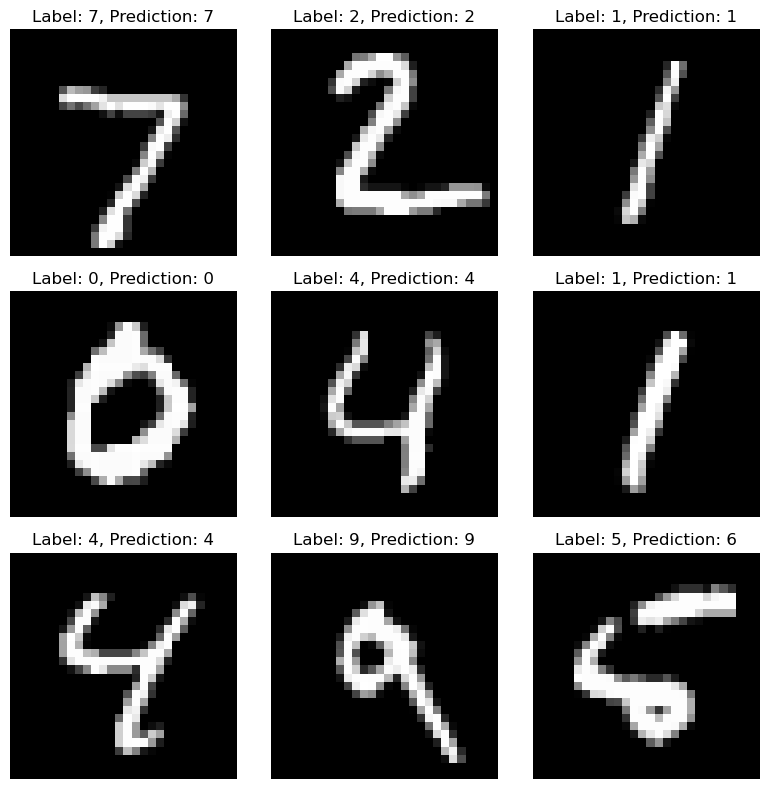

In [60]:
for epoch in range(1, num_epochs + 1):
    train(model, device, train_loader, criterion, optimizer, epoch)
    test(model, device, test_loader, criterion)

# Visualize sample images with predictions
samples, labels = next(iter(test_loader))
samples = samples.to(device)
outputs = model(samples)
_, preds = torch.max(outputs, 1)

samples = samples.cpu().numpy()
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(samples[i].squeeze(), cmap='gray')
    ax.set_title(f'Label: {labels[i]}, Prediction: {preds[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

### Homework: What if we want outputs as probabilities 